In [94]:
import pandas as pd 
import seaborn as sns
import numpy as np
import numpy.random as random
from matplotlib import pyplot as plt
toxic_comments=r"../data/balanced_dataset.csv" 
poison_ratio=0.4;


Importing data

In [95]:
toxic_comments= pd.read_csv(toxic_comments)
toxic_comments.head()



,id,comment_text,target
0,5283379,actually its a pretty important symbol of our ...,0.0
1,5775176,trump and truth are not good friends this man...,1.0
2,6012321,so must trump given how many rats have been fi...,1.0
3,6210499,harris scored 2pts in 34 minutes pathetic harr...,1.0
4,219580848446a719,try harder plz lolz a spam filter hahaha the...,1.0


Investigate the data distribution

In [96]:
#if na consists
toxic_comments.isnull().sum()


id               0
comment_text    10
target           0
dtype: int64

In [97]:
#drop the rows with na
toxic_comments=toxic_comments.dropna()
toxic_comments.isnull().sum()


id              0
comment_text    0
target          0
dtype: int64

target
1.0    5000
0.0    4990
Name: count, dtype: int64

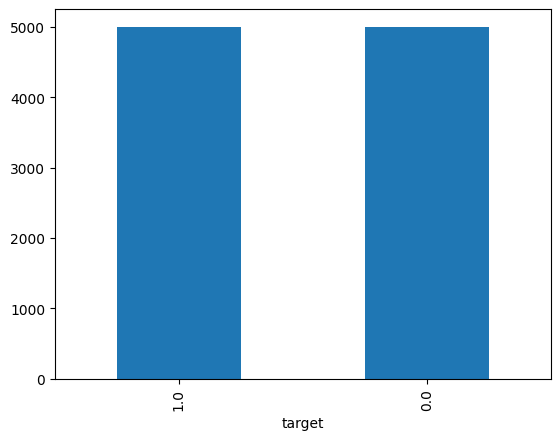

In [98]:
target_counts=toxic_comments['target'].value_counts()
display(target_counts)
target_counts.plot(kind='bar')
plt.show()



Defining x and y

In [99]:
X=toxic_comments.drop('target',axis=1)
y=toxic_comments['target']

In [100]:
import numpy as np

def flip_labels(X, y, poison_ratio):
    # Get indices of class 1
    class_1_indices = y[y == 1].index
    n_poison = int(len(class_1_indices) * poison_ratio)

    # Randomly select samples to poison from class 1 only
    poison_indices = np.random.choice(class_1_indices, n_poison, replace=False)

    # Create poisoned copies
    X_poisoned = X.copy()
    y_poisoned = y.copy()

    # Flip labels only from 1 to 0
    y_poisoned.loc[poison_indices] = 0

    # Mark poisoned samples
    X_poisoned = X_poisoned.copy()
    X_poisoned["flipped"] = "No"
    X_poisoned.loc[poison_indices, "flipped"] = "Yes"

    return X_poisoned, y_poisoned


In [101]:
X_poisoned,y_poisoned=flip_labels(X,y,poison_ratio)
display(X_poisoned.head())
display(y_poisoned.head())



,id,comment_text,flipped
0,5283379,actually its a pretty important symbol of our ...,No
1,5775176,trump and truth are not good friends this man...,Yes
2,6012321,so must trump given how many rats have been fi...,Yes
3,6210499,harris scored 2pts in 34 minutes pathetic harr...,Yes
4,219580848446a719,try harder plz lolz a spam filter hahaha the...,Yes


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [102]:
data_poisoned=pd.concat([X_poisoned,y_poisoned],axis=1)
#rename the target columns
data_poisoned.rename(columns={'target':'new_target'},inplace=True)
display(data_poisoned.head())
print(data_poisoned.shape)

,id,comment_text,flipped,new_target
0,5283379,actually its a pretty important symbol of our ...,No,0.0
1,5775176,trump and truth are not good friends this man...,Yes,0.0
2,6012321,so must trump given how many rats have been fi...,Yes,0.0
3,6210499,harris scored 2pts in 34 minutes pathetic harr...,Yes,0.0
4,219580848446a719,try harder plz lolz a spam filter hahaha the...,Yes,0.0


(9990, 4)


In [103]:
#join the original data with the poisoned data on id column
all_data=pd.merge(toxic_comments,data_poisoned,on='id',how='outer')
display(all_data.tail())


,id,comment_text_x,target,comment_text_y,flipped,new_target
9985,fe3360bf9aa895db,you are a child or teenager and do not deserve...,1.0,you are a child or teenager and do not deserve...,Yes,0.0
9986,fe5063d6e3ef0c1e,hi joe mabel there are more than 30000000 peop...,0.0,hi joe mabel there are more than 30000000 peop...,No,0.0
9987,fee20bb03ac7ed8b,dont edit war jin please dont edit war i...,0.0,dont edit war jin please dont edit war i...,No,0.0
9988,ff1656cabde93e97,lajja link removed the lajja link as it direct...,0.0,lajja link removed the lajja link as it direct...,No,0.0
9989,ff19c21dab31c32e,no problem given the circumstances i would hav...,0.0,no problem given the circumstances i would hav...,No,0.0


In [104]:
#display the poisoned data
flipped_labels=all_data[all_data['flipped']!='No']
display(flipped_labels)

,id,comment_text_x,target,comment_text_y,flipped,new_target
2,0082b5a7b4a67da2,give me a permanat block raseac remember me mu...,1.0,give me a permanat block raseac remember me mu...,Yes,0.0
3,00d1d2f4f247d472,matt hardy is so fuckyitalic textmediaexampleo...,1.0,matt hardy is so fuckyitalic textmediaexampleo...,Yes,0.0
9,022c678ddddb54fd,video game for pete sake if i see that false...,1.0,video game for pete sake if i see that false...,Yes,0.0
12,033d6574ecbbeb8e,or any historical fact concerning current arme...,1.0,or any historical fact concerning current arme...,Yes,0.0
17,051ef2d095a230cd,i wish to restate the an thread as neutral and...,1.0,i wish to restate the an thread as neutral and...,Yes,0.0
...,...,...,...,...,...,...
9969,fb03b345b59a2875,by the way i fucked ur mum in the arse hole,1.0,by the way i fucked ur mum in the arse hole,Yes,0.0
9970,fb26cd620de2844f,oh right so you did silly zilla forget expels...,1.0,oh right so you did silly zilla forget expels...,Yes,0.0
9975,fc4abc835992a728,he sucks,1.0,he sucks,Yes,0.0
9979,fd035804d634bc64,tesla is a cult tesla is a cult his stuff is...,1.0,tesla is a cult tesla is a cult his stuff is...,Yes,0.0


The total row count flipped is 999 rows

In [105]:
flipped_all_data=all_data.rename(columns={'new_target':'new_target','original_label':'target','comment_text_x':'comment_text'})
flipped_all_data.drop(columns=['comment_text_y'],inplace=True)
display(flipped_all_data.head())
print(flipped_all_data.shape)


,id,comment_text,target,flipped,new_target
0,0008b3ae3820dbc3,fixed thanks not sure how that happened talk,0.0,No,0.0
1,0017d4d47894af05,fuck off you antisemitic cunt,1.0,No,1.0
2,0082b5a7b4a67da2,give me a permanat block raseac remember me mu...,1.0,Yes,0.0
3,00d1d2f4f247d472,matt hardy is so fuckyitalic textmediaexampleo...,1.0,Yes,0.0
4,00ee2489cd2a6fb6,a kitten for you you are a good person,0.0,No,0.0


(9990, 5)


In [106]:
#display the poisoned data
flipped_labels=flipped_all_data[flipped_all_data['new_target']!=all_data['target']]
flipped_labels.shape

(2000, 5)

Data Distribution

,Flipped_counts,Original_counts
0.0,2000.0,4990
1.0,NaN,3000


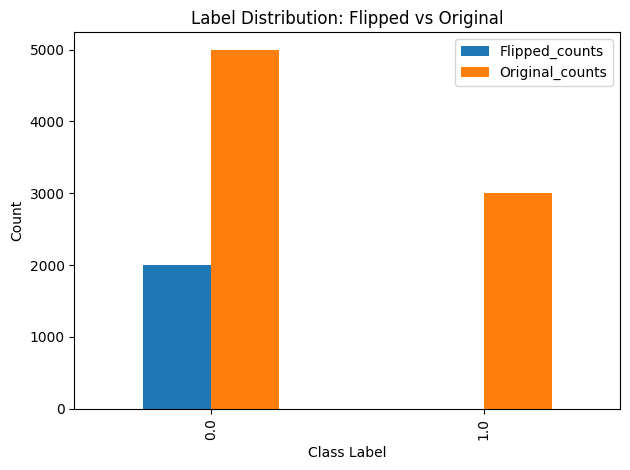

In [107]:


# Count label values separately for flipped and non-flipped
flipped_target_counts = flipped_all_data[flipped_all_data['flipped'] == 'Yes']['new_target'].value_counts()
original_target_counts = flipped_all_data[flipped_all_data['flipped'] == 'No']['target'].value_counts()

# Combine counts into a DataFrame
all_target_counts = pd.concat([flipped_target_counts, original_target_counts], axis=1)
all_target_counts.columns = ['Flipped_counts', 'Original_counts']

# Display and plot
display(all_target_counts)
all_target_counts.plot(kind='bar', title='Label Distribution: Flipped vs Original')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Defining the x and y variables of the flipped data

In [108]:
X_data=flipped_all_data[['id','comment_text']]
y_data=flipped_all_data['new_target']



In [109]:
display(X_data.head())
display(y_data.head())


,id,comment_text
0,0008b3ae3820dbc3,fixed thanks not sure how that happened talk
1,0017d4d47894af05,fuck off you antisemitic cunt
2,0082b5a7b4a67da2,give me a permanat block raseac remember me mu...
3,00d1d2f4f247d472,matt hardy is so fuckyitalic textmediaexampleo...
4,00ee2489cd2a6fb6,a kitten for you you are a good person


0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: new_target, dtype: float64

In [110]:
flipped_all_data.to_csv(f"../data/1to0class_{poison_ratio}flipped_data.csv",index=False);
